# 3.1 API를 이용한 Quandl 데이터 다운로드

In [1]:
import pandas as pd
url_aapl = 'https://www.quandl.com/api/v3/datasets/WIKI/AAPL/data.csv?api_key=xw3NU3xLUZ7vZgrz5QnG'
data_aapl = pd.read_csv(url_aapl)

data_aapl.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2018-03-27,173.68,175.15,166.92,168.340,38962839.0,0.0,1.0,173.68,175.15,166.92,168.340,38962839.0
1,2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0
2,2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0
3,2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0
4,2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0


# 3.2 DataReader() 함수를 이용한 API 다운로드

## 3.2.1 주가 다운로드

In [2]:
# 참조: https://wikidocs.net/4370

import pandas_datareader as web
AAPL = web.DataReader('AAPL', 'yahoo')
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-08,23.924999,23.260000,23.282499,23.752501,216085600.0,22.125422
2016-02-09,23.985001,23.482500,23.572500,23.747499,177324800.0,22.120768
2016-02-10,24.087500,23.525000,23.980000,23.567499,169374400.0,21.953094
2016-02-11,23.680000,23.147499,23.447500,23.424999,200298800.0,21.820358
2016-02-12,23.625000,23.252501,23.547501,23.497499,161405600.0,21.887894


<AxesSubplot:xlabel='Date'>

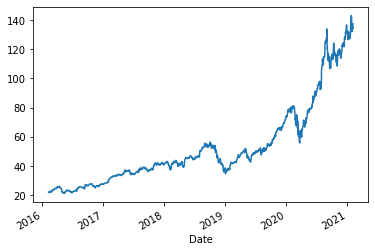

In [3]:
import matplotlib.pyplot as plt

AAPL['Adj Close'].plot()

In [4]:
AAPL_long = web.DataReader('AAPL', 'yahoo', '2000-01-01', '2010-12-31')

In [5]:
AAPL_long.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-12-31,0.918527,0.888393,0.901228,0.917969,163811200.0,0.791887
2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.862169
2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.789480
2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.801032
2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.731712


In [6]:
AAPL_long.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-12-27,11.622857,11.482857,11.530357,11.595714,249816000.0,10.003050
2010-12-28,11.666429,11.609286,11.639643,11.623929,175924000.0,10.027393
2010-12-29,11.658929,11.610714,11.650714,11.617500,163139200.0,10.021844
2010-12-30,11.625357,11.537500,11.624286,11.559286,157494400.0,9.971627
2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.937733


In [7]:
tickers = ['FB', 'NVDA']

all_data = {}
for ticker in tickers:
    all_data[ticker] = web.DataReader(ticker, 'yahoo')

In [8]:
 all_data

{'FB':                   High         Low        Open       Close    Volume  \
 Date                                                                   
 2016-02-08  102.680000   97.459999  100.410004   99.750000  71229700   
 2016-02-09  102.400002   96.820000   97.139999   99.540001  62709000   
 2016-02-10  103.250000  100.239998  101.550003  101.000000  45179400   
 2016-02-11  105.110001   98.879997   99.599998  101.910004  43670600   
 2016-02-12  104.239998  101.089996  103.739998  102.010002  36176800   
 ...                ...         ...         ...         ...       ...   
 2021-01-29  266.559998  254.850006  265.299988  258.329987  30389500   
 2021-02-01  264.170013  254.910004  259.519989  262.010010  22914300   
 2021-02-02  268.850006  263.269989  264.000000  267.079987  17320800   
 2021-02-03  269.200012  263.839996  265.619995  266.649994  14223400   
 2021-02-04  268.160004  264.000000  267.010010  266.489990  16039300   
 
              Adj Close  
 Date            

## 3.2.2 국내 종목 주가 다운로드

In [9]:
samsung = web.DataReader('005930.KS', 'yahoo')

In [10]:
samsung['Close'].tail()

Date
2021-02-01    83000.0
2021-02-02    84400.0
2021-02-03    84600.0
2021-02-04    82500.0
2021-02-05    83500.0
Name: Close, dtype: float64

In [11]:
cell_pharm = web.DataReader('068760.KQ', 'yahoo')

In [12]:
cell_pharm['Close'].tail()

Date
2018-01-26     97400.0
2018-01-29     99900.0
2018-01-30     99500.0
2018-01-31     97500.0
2021-02-05    180500.0
Name: Close, dtype: float64

## 3.2.3 FRED 데이터 다운로드

- https://junyoru.tistory.com/122 <- 여기 참고
- https://fred.stlouisfed.org/docs/api/fred/
- Python 검색 후 3번째 [mortada/fredapi (third-party software, external link)]
- https://github.com/mortada/fredapi

In [ ]:
#import keyring
#keyring.set_password('Henry', 'fred_api_key', 'Your API Key')

In [12]:
import keyring
fred_api_key = keyring.get_password('Henry', 'fred_api_key')
fred = Fred(api_key = fred_api_key)

In [14]:
from fredapi import Fred
data = fred.get_series('DGS10')

data

1962-01-02    4.06
1962-01-03    4.03
1962-01-04    3.99
1962-01-05    4.02
1962-01-08    4.03
              ... 
2021-02-02    1.12
2021-02-03    1.15
2021-02-04    1.15
2021-02-05    1.19
2021-02-08    1.19
Length: 15420, dtype: float64

<AxesSubplot:>

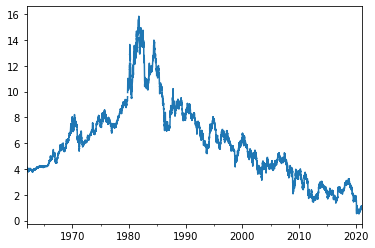

In [15]:
data.plot()

In [16]:
fx = fred.get_series('DEXKOUS')

fx.tail()

2021-01-25    1101.02
2021-01-26    1103.26
2021-01-27    1104.09
2021-01-28    1111.95
2021-01-29    1118.35
dtype: float64